In [22]:
# Importando todas las librerias del proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Creamos un DataFrame de un archivo csv
fuentes_co2 = pd.read_excel('archivo.xlsx', index_col=0, engine='openpyxl')

#Mostramos el DataFrame para ver que contiene el archivo
fuentes_co2.head()

,Carbon,Cemento,Gas,Petroleo
Fecha,,,,
1959,4.9,0.1,0.8,2.9
1960,5.2,0.2,0.8,3.1
1961,4.9,0.2,0.9,3.3
1962,4.9,0.2,1.0,3.6
1963,5.1,0.2,1.0,3.8


In [24]:
# Aplicamos describe() para ver a detalle todo en el DataFrame
fuentes_co2.describe()

,Carbon,Cemento,Gas,Petroleo
count,64.000000,64.000000,64.000000,64.000000
mean,9.175000,0.703125,3.953125,8.940625
std,3.464835,0.474415,2.086842,2.576679
min,4.900000,0.100000,0.800000,2.900000
25%,5.975000,0.300000,2.300000,8.175000
50%,8.600000,0.500000,3.850000,9.200000
75%,12.350000,1.100000,5.550000,11.125000
max,15.100000,1.700000,7.900000,12.300000


In [25]:
# Aplicamos info() para verificar el tipo de variables y si tenemos valores faltantes
fuentes_co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 1959 to 2022
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Carbon    64 non-null     float64
 1   Cemento   64 non-null     float64
 2   Gas       64 non-null     float64
 3   Petroleo  64 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


### ***Limpieza de datos***

Realizaremos un proceso de limpieza teniendo en cuenta las situaciones mas comunes:

    1. Datos faltantes en algunas celdas
    2. Registros (filas) repetidos
    3. Valores extremos (outliers) en el caso de las variables numericas.
    4. Errores tipograficos

1. Datos faltantes en algunas celdas

**Observacion:** Comprobamos que no tenemos datos nulos

2. Registros (filas) repetidos

In [26]:
# Eliminamos todos los registros repetidos
fuentes_co2.drop_duplicates(inplace=True)
# Verificamos que tenemos la misma cantidad de datos no-null en todas las columnas
fuentes_co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 1959 to 2022
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Carbon    64 non-null     float64
 1   Cemento   64 non-null     float64
 2   Gas       64 non-null     float64
 3   Petroleo  64 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


3. Valores extremos (outliers) en el caso de las variables numericas.

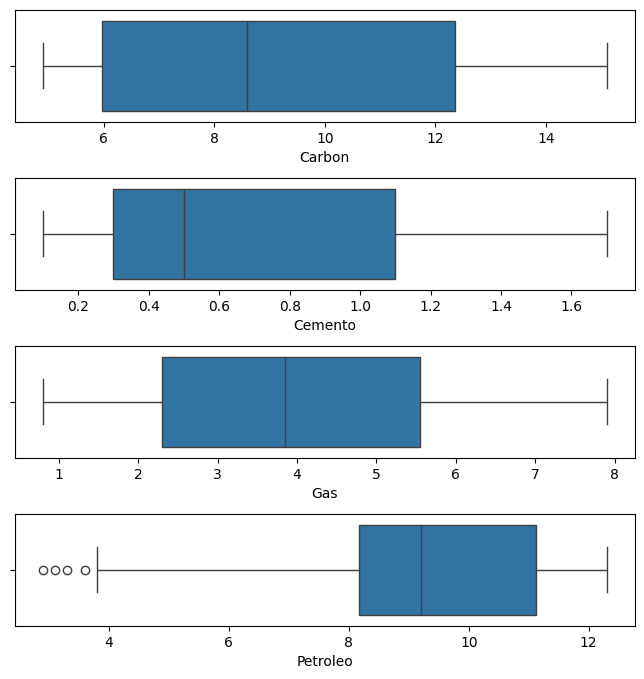

In [27]:
cols_num = ['Carbon', 'Cemento', 'Gas', 'Petroleo']

fig, ax = plt.subplots(nrows=4, ncols=1,figsize = (8,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(cols_num):
    sns.boxplot(x=col, data=fuentes_co2, ax=ax[i])
    #ax[i].set_title(col)

**Observacion:** Comprobamos que no tenemos Outliers, a pesar de que en Petroleo tenemos valores fuera, puedes ser valor perfectamente normales porque no son valores exagerados

4. Errores tipograficos

**Observacion:** Comprobamos que no tenemos datos tipo string, asi que no necesitamos de este analisis

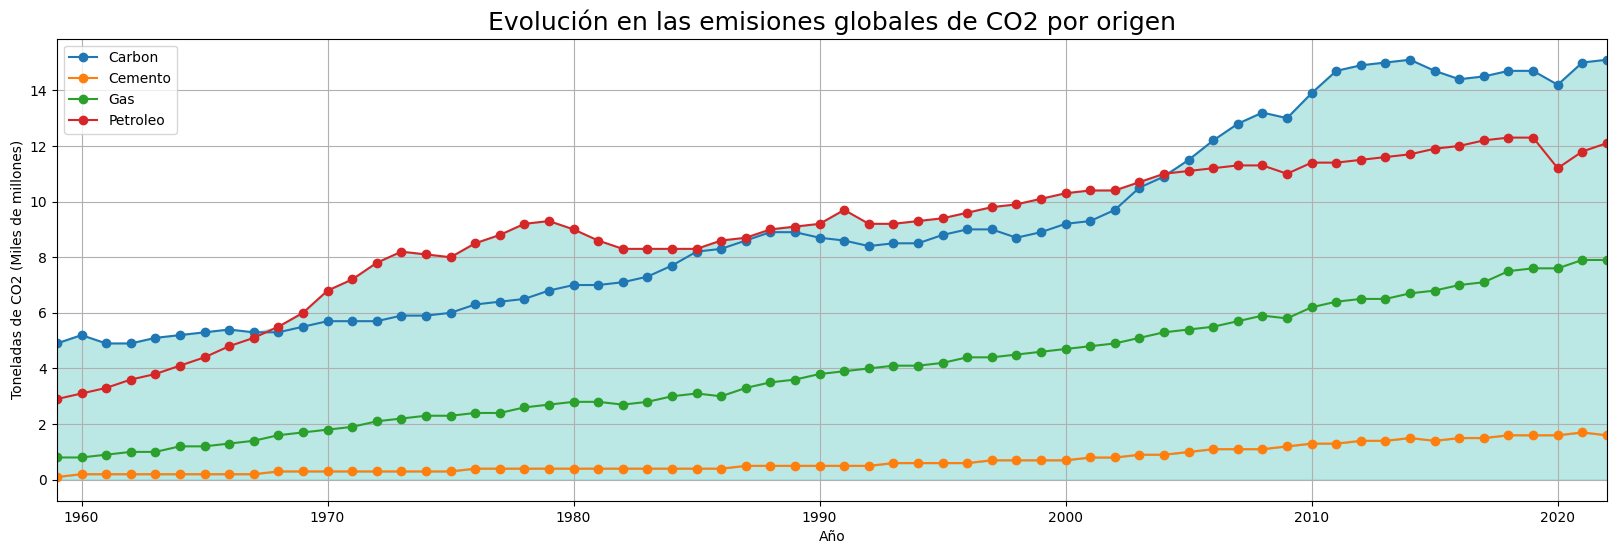

In [63]:

plt.figure(figsize=(20, 6))
plt.xlim(1959,2022)

# Graficar cada columna
for column in fuentes_co2.columns:
    plt.plot(fuentes_co2.index, fuentes_co2[column], marker='o', label=column)

# Rellenar el área bajo las lineas con el mismo color
plt.fill_between(fuentes_co2.index, fuentes_co2.min(axis=1), fuentes_co2.max(axis=1), color='lightseagreen', alpha=0.3)
plt.fill_between(fuentes_co2.index, fuentes_co2['Cemento'], color='lightseagreen', alpha=0.3)


plt.title('Evolución en las emisiones globales de CO2 por origen', fontsize=18)
plt.xlabel('Año')
plt.ylabel('Toneladas de CO2 (Miles de millones)')
plt.legend()

plt.grid(True) # Mostrar la cuadrícula
plt.show()